array([[[114, 115, 111],
        [114, 115, 111],
        [101, 101, 101],
        ...,
        [ 88,  86,  75],
        [ 94,  89,  80],
        [ 95,  90,  81]],

       [[114, 115, 111],
        [114, 115, 111],
        [101, 102, 100],
        ...,
        [ 88,  86,  75],
        [ 93,  88,  79],
        [ 94,  89,  80]],

       [[111, 113, 107],
        [111, 112, 108],
        [ 99, 100,  98],
        ...,
        [ 91,  88,  74],
        [ 92,  88,  77],
        [ 92,  88,  77]],

       ...,

       [[ 82,  68,  46],
        [ 82,  68,  46],
        [ 81,  66,  47],
        ...,
        [ 83,  82,  56],
        [ 83,  81,  57],
        [ 84,  82,  58]],

       [[ 81,  67,  45],
        [ 81,  67,  45],
        [ 80,  65,  46],
        ...,
        [ 83,  82,  56],
        [ 82,  82,  58],
        [ 84,  83,  62]],

       [[ 80,  66,  44],
        [ 80,  66,  44],
        [ 79,  64,  45],
        ...,
        [ 82,  81,  55],
        [ 83,  83,  59],
        [ 87,  86,  65]]

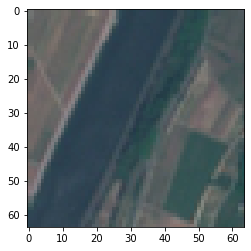

In [1]:
from keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


img = image.load_img("testImages/River_1.jpg")
plt.imshow(img)


cv2.imread("testImages/River_1.jpg")


In [2]:

train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

validation_generator = validation.flow_from_directory('validation', target_size=(
    200, 200))

train_dataset = train.flow_from_directory('trainImages', target_size=(
    200, 200), color_mode="rgb", batch_size=100, class_mode='categorical')

train_dataset.class_indices


Found 0 images belonging to 0 classes.
Found 9000 images belonging to 3 classes.


{'AnnualCrop': 0, 'Forest': 1, 'SeaLake': 2}

In [3]:



train_dataset.classes


array([0, 0, 0, ..., 2, 2, 2])

In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='sigmoid'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')])



In [5]:

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='binary_crossentropy',
              optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.01),
              metrics=['accuracy'] )     




In [ ]:

model_fit = model.fit(train_dataset,
            steps_per_epoch =10 ,
            epochs = 20,
            validation_data = validation_generator,
            validation_steps = 8
            )

print(model_fit)           



Epoch 1/20
10/10 [==============================] - 48s 5s/step - loss: 2.0545 - accuracy: 0.6000
Epoch 2/20
10/10 [==============================] - 38s 4s/step - loss: 0.8279 - accuracy: 0.5333
Epoch 3/20
10/10 [==============================] - 41s 4s/step - loss: 0.7913 - accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 38s 4s/step - loss: 0.7894 - accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 39s 4s/step - loss: 0.7893 - accuracy: 0.5000
Epoch 6/20
10/10 [==============================] - 39s 4s/step - loss: 0.7893 - accuracy: 0.5000
Epoch 7/20
10/10 [==============================] - 40s 4s/step - loss: 0.7893 - accuracy: 0.5000
Epoch 8/20
10/10 [==============================] - 39s 4s/step - loss: 0.7893 - accuracy: 0.5000
Epoch 9/20
10/10 [==============================] - 40s 4s/step - loss: 0.7893 - accuracy: 0.5000
Epoch 10/20
10/10 [==============================] - 41s 4s/step - loss: 0.7893 - accuracy: 0.5000
Epoch 11/20
10/10 [

In [ ]:
dir_path = 'testImages'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i, target_size=(200,200,3)  )
    plt.imshow(img)
    plt.show()


    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    print(val)
    # if val == 0:
    #     print('AnnualCrop')
    # elif val == 1:
    #     print("Forest")
    # elif val == 2:
    #     print("HerbaceousVegetation")
    # elif val == 3:
    #     print("Highway")
    # elif val == 4:
    #     print("Industrial")
    # elif val == 5:
    #     print("Pasture")
    # elif val == 6:
    #     print("PermanentCrop")
    # elif val == 7:
    #     print("Residential")  
    # elif val == 8:
    #     print("River")
    # else:
    #     print("SeaLake")                              


